<a href="https://colab.research.google.com/github/dafoll/ResponsiveWebDesign/blob/main/TP_Entregable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema a resolver
Hoy en día existen muchas páginas web que permiten comprar y vender viviendas de forma mucho más sencilla y rápida que antes, sin embargo, a la hora de publicar una vivienda o al momento de la elección para la compra, son muchas las interrogantes que le surgen a los usuarios con respecto a los precios de estas, como por ejemplo ¿Estarán bien valorizadas?,¿A qué precio puedo vender la propiedad? ¿El precio será competitivo?,¿Cuál es el precio más alto en el que puedo venderla?, ¿Será el mejor precio para comprarla según la zona?,¿La cantidad de habitaciones y metros cuadrados justifica el precio?, entre muchas otras. Es por esto que con este dataset se busca realizar un modelo que sea capaz de predecir el precio de las viviendas para facilitarle al usuario tazar las propiedades que posee o que desea adquirir y que el proceso de venta y compra sea aún más sencillo.

Este modelo permitirá tazar las viviendas y traerá beneficios a todos los tipo de usuarios de las plataformas de comercialización de viviendas, ya que los vendedores (Dueños, concesionarias y constructoras) podrán determinar un precio de venta competitivo basado en los usuarios de esa página específica para aumentar la posibilidad de atraer compradores interesados y que les permita maximizar su ganancia sin sobrevalorar la propiedad, reduciendo además el tiempo que la propiedad pasa en el mercado lo que genera un ahorro en los costos de las ventas prolongadas.

Mientras que los compradores, podrán utilizar el modelo para tener una idea realista de los precio de las viviendas en el mercado, pudiendo tomar decisiones informadas, evitar estafas y para poder negociar precios justos evitando pagos de más por una propiedad.

Por otro lado, también puede ser beneficioso para las páginas de comercialización de propiedades ya que podría contribuir a una mayor eficiencia de precios en el mercado ya que evita la infravaloración y la sobrevaloración de las viviendas reduciendo la volatilidad de los precios y mejorando la experiencia del usuario.

Para la realización de este modelo se utilizará un dataset que contiene las características de las viviendas que fueron publicadas en una página de comercialización de propiedades de la India con el fin de analizar cuales son las variables más relevantes a la hora de establecer el precio de las viviendas.

A continuación, se realizará un analisis exploratorio del dataset con el fin de:
- Entender  el comportamiento de los datos
- Identificar patrones y tendencias entre las variables
- Detectar valores atípicos que puedan generar ruido en el modelo
- Describir las variables de una forma cuantitativa con la media,la desviación estandar y los cuartiles
- Comprender la distribución de las variables en los datos
- Selección de variables relevantes
- Limpieza de los datos.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import statsmodels.api as sm

In [ ]:
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Analisis exploratorio base de datos caso: Precio de las viviendas
## Descripción del dataset
- El dataset contiene 12 features y 29451 ejemplos
- Contiene tres features categoricos Posted_by, BHK_OR_RK y Address
- No contiene datos nulos

### Descripción de variables:
* POSTED_BY: Quien subió la publicación (Dealer: Consecionario, Owner:Dueño ó Builder:Constructor) *categorica*
* UNDER_CONSTRUCTION: Bajo construccion (1:En construcción ó 0:Construida) *binario*
* RERA: Esta bajo la ley de regulación de inmuebles (1:cumple ó 0:no cumple) *binario*
* BHK_NO.: Cantidad de habitaciones de la casa mas la sala y la cocina *entero*
* BHK_OR_RK: Tipo de distribución (BHK:Habitaciones más cocina y sala ó RK:Habitaciones más cocina)  *categorico*
* SQUARE_FT: Metros cuadrados *float(numerico real)*
* READY TO MOVE: listo para mudarse (1:listo para mudarse ó 0:No esta listo para mudarse) *binario*
* RESALE: Reventa (1:Más de un dueño ó 0:Un solo dueño) *binario*
* ADDRESS: Direccion *texto*
* LONGITUDE: Coordenadas de norte a sur para saber la ubicación *float(numerico real)*
* LATITUDE: Coordenadas de este a oeste para saber la ubicación *float(numerico real)*
* TARGET (PRICE_IN_CLASS): Precio *LABEL OBJETIVO*

# Leer Dataset

In [ ]:
!git clone "https://github.com/PASCUALREY/dataset.git"
casas=pd.read_csv("/content/dataset/train.csv")
casas.rename(columns={'BHK_NO.': "BHK_NRO"}, inplace=True)
casas.rename(columns={"TARGET(PRICE_IN_LACS)":"TARGET"},inplace=True)

fatal: destination path 'dataset' already exists and is not an empty directory.


In [ ]:
casas.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NRO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
casas.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NRO               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
TARGET                0
dtype: int64

# Analisis univariado

### Tipo de vivienda (BHK_OR_RK)

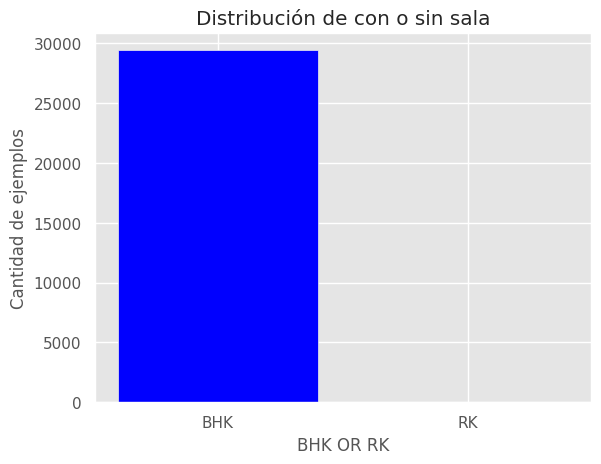

In [ ]:
counts = casas['BHK_OR_RK'].value_counts()
colores=["blue","red"]
plt.bar(counts.index, counts.values,color=colores)
plt.xlabel('BHK OR RK')
plt.ylabel('Cantidad de ejemplos')
plt.title('Distribución de con o sin sala')
plt.show()

### Por quien fue posteado (POSTED_BY)

In [ ]:
casas["POSTED_BY"].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

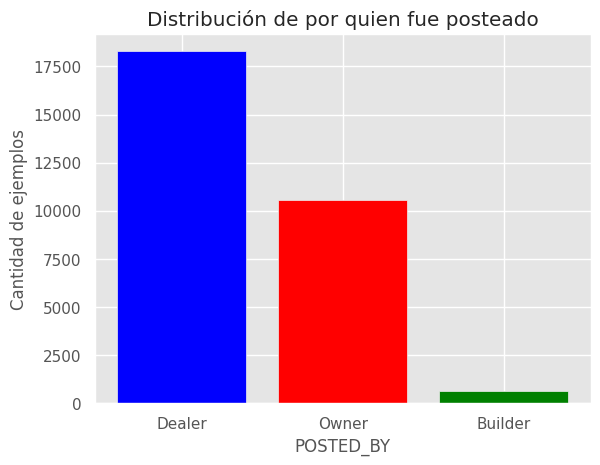

In [ ]:
counts = casas['POSTED_BY'].value_counts()
colores=["blue","red","green","orange"]
plt.bar(counts.index, counts.values,color=colores)
plt.xlabel('POSTED_BY')
plt.ylabel('Cantidad de ejemplos')
plt.title('Distribución de por quien fue posteado')
plt.show()

In [ ]:
casas.UNDER_CONSTRUCTION.value_counts()

0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64

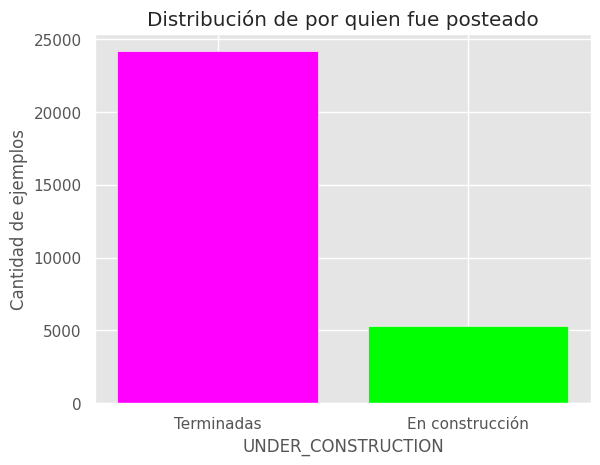

In [ ]:
counts = casas['UNDER_CONSTRUCTION'].value_counts()
categoria=["Terminadas","En construcción"]
colores=["magenta","lime"]
plt.bar(categoria, counts.values,color=colores)
plt.xlabel('UNDER_CONSTRUCTION')
plt.ylabel('Cantidad de ejemplos')
plt.title('Distribución de por quien fue posteado')

plt.show()

# Analisis multivariado

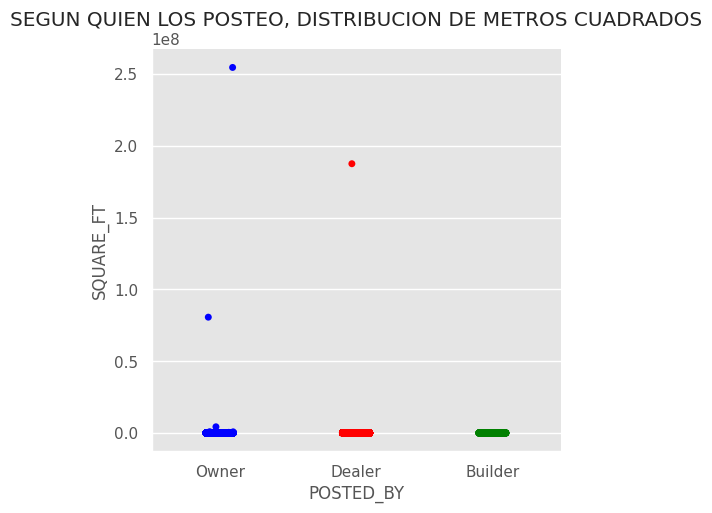

In [ ]:
colores=["blue","red","green"]
grafico=sns.catplot(data=casas, x="POSTED_BY", y="SQUARE_FT",hue="POSTED_BY",palette=colores)
grafico.set(title='SEGUN QUIEN LOS POSTEO, DISTRIBUCION DE METROS CUADRADOS')

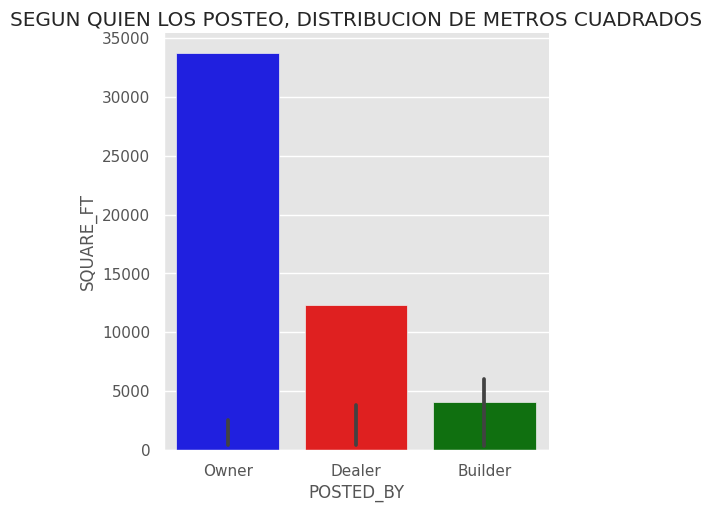

In [ ]:
colores=["blue","red","green","orange"]
grafico=sns.catplot(data=casas, x="POSTED_BY", y="SQUARE_FT", errorbar=("pi", 95), kind="bar",palette=colores)
grafico.set(title='SEGUN QUIEN LOS POSTEO, DISTRIBUCION DE METROS CUADRADOS')

**SE PUEDE OBSERVAR QUE:**
- **HAY OUTLIERS CON RESPECTO A LOS METROS CUADRADOS YA QUE SE OBSERVA COMO ESOS TRES EJEMPLOS DE VIVIENDAS QUE MIDEN MAS DE 100,000,000 METROS CUADRADOS DISTORCIONAN LA DISTRIBUCION DE LOS DATOS**
- **COMO LA BARRA DE ERROR ES MAS PEQUENA QUE LA DE LA MEDIA, SIGNIFICA QUE LOS DATOS TIENDEN A ESTAR MAS CERCA DEL PROMEDIO Y LOS VALORES VARIAN MENOS COMO SE PUEDE OBSERVAR EN LAS CATEGORIAS DE DUEÑO Y CONCESIONARIA**
- **PROBABLEMENTE LOS DATOS DE METROS CUADRADOS EN LA CATEGORIA DE CONSTRUCTOR SEAN MAS VARIABLES Y ESTEN MAS SEPARADOS DE LA MEDIA**

### Bajo construcción (UNDER_CONSTRUCTION)

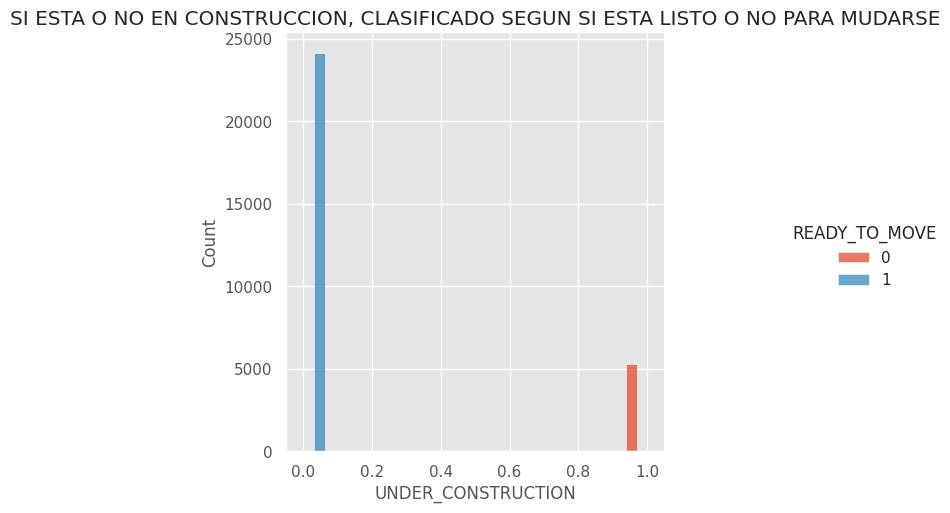

In [ ]:
grafico=sns.displot(casas, x="UNDER_CONSTRUCTION", hue="READY_TO_MOVE", multiple="dodge")
grafico.set(title='SI ESTA O NO EN CONSTRUCCION, CLASIFICADO SEGUN SI ESTA LISTO O NO PARA MUDARSE')

**SE PUEDE OBSERVAR QUE:**
- **TIENE LOGICA QUE LOS QUE NO ESTAN TERMINADOS NO ESTEN LISTOS PARA MUDARSE (DEBERIA TENER UNA CORRELACION NEGATIVA PERFECTA)**
- **TODOS LOS QUE ESTAN TERMINADOS ESTAN LISTOS PARA MUDARSE**

# Analisis features contra Target

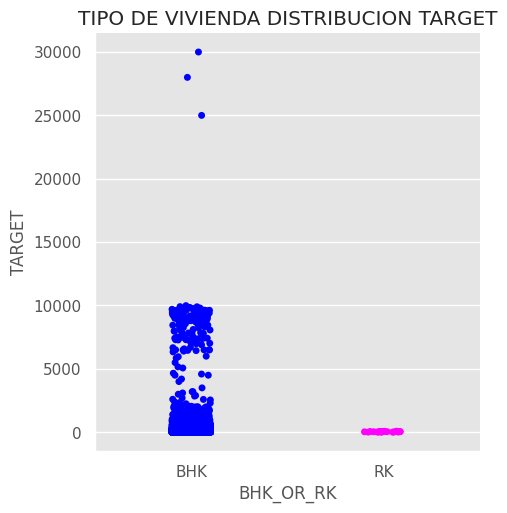

In [ ]:
colores=["blue","magenta"]
grafico=sns.catplot(data=casas, x="BHK_OR_RK", y="TARGET",hue="BHK_OR_RK",palette=colores)
grafico.set(title='TIPO DE VIVIENDA DISTRIBUCION TARGET')

**EN EL GRÁFICO SE PUEDE OBSERVAR QUE:**
- **EL NRO DE EJEMPLOS DE CASAS QUE TIENEN SOLO HABITACIONES Y COCINA ES DEMASIADO PEQUEÑO EN COMPARACIÓN CON LAS QUE TIENEN HABITACIONES, COCINA Y SALA**

- **HAY TRES VIVIENDAS QUE TIENEN UN COSTO DEMASIADO SUPERIOR CON RESPECTO A LA MAYORIA DE LOS DATOS QUE PARECEN SER OUTLIERS, LO QUE PUEDE REPRESENTAR UN PROBLEMA EN LA DISTRIBUCIÓN DE LOS DATOS**

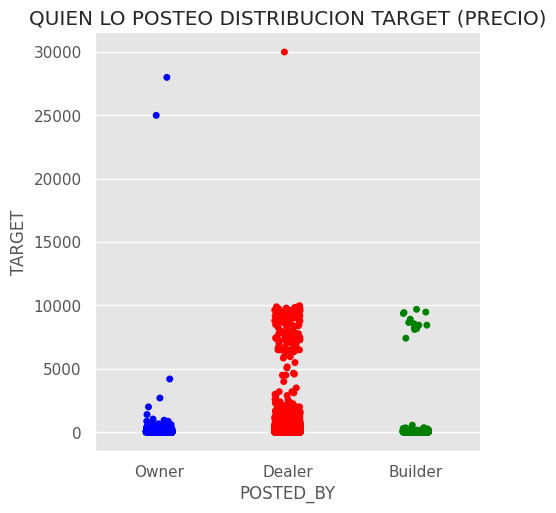

In [ ]:
colores=["blue","red","green"]
grafico=sns.catplot(data=casas, x="POSTED_BY", y="TARGET",hue="POSTED_BY",palette=colores)
grafico.set(title='QUIEN LO POSTEO DISTRIBUCION TARGET (PRECIO)')

**SE PUEDE OBSERVAR QUE:**
- **LAS CONCESIONARIAS Y LAS CONSTRUCTORAS SON LOS QUE OFRECEN LAS VIVIENDAS MAS COSTOSAS**
- **LAS CONCESIONARIAS SON LAS QUE MAS OFRECEN VIVIENDAS**
- **PARECEN EXISTIR DATOS RUIDOSOS QUE PUEDEN REPRESENTAR ESTAFAS O ERRORES AL MOMENTO DE INTRODUCIR LA INFORMACIÓN**

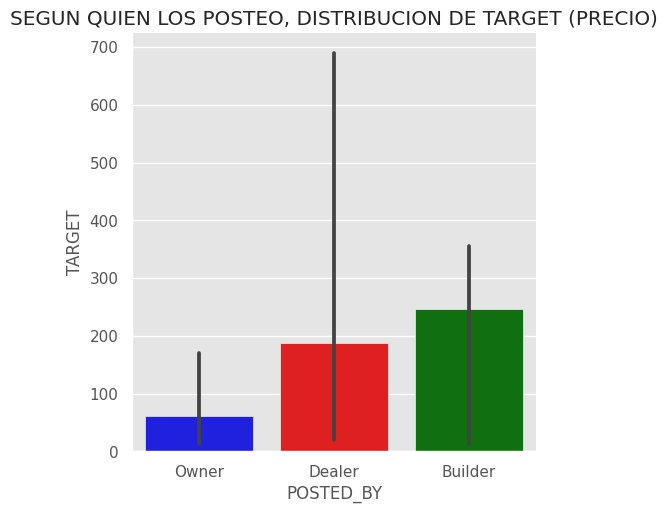

In [ ]:
colores=["blue","red","green","orange"]
grafico=sns.catplot(data=casas, x="POSTED_BY", y="TARGET", errorbar=("pi", 95), kind="bar",palette=colores)
grafico.set(title='SEGUN QUIEN LOS POSTEO, DISTRIBUCION DE TARGET (PRECIO)')

- **COMO LA BARRA NEGRA ES MAS GRANDE QUE LA DE COLOR, SE PUEDE CONCLUIR QUE LOS DATOS ESTAN MUY DISPERSOS AL REDEDOR DE LA MEDIA Y LA VARIABILIDAD DE LOS VALORES DEL TARGET ES ALTA EN LA CATEGORIA DEALER Y ESTO SE PUEDE DEBER A QUE EXISTEN EJEMPLOS RUIDOSOS CON RESPECTO AL TARGET Y QUE HAY MAS DATOS EN ESA CATEGORIA**

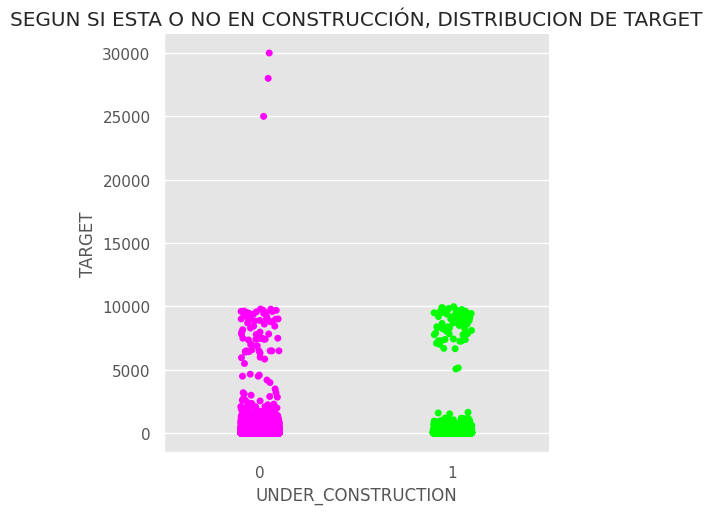

In [ ]:
colores=["magenta","lime"]
grafico=sns.catplot(data=casas, x="UNDER_CONSTRUCTION", y="TARGET",hue="UNDER_CONSTRUCTION", palette=colores)
grafico.set(title='SEGUN SI ESTA O NO EN CONSTRUCCIÓN, DISTRIBUCION DE TARGET')

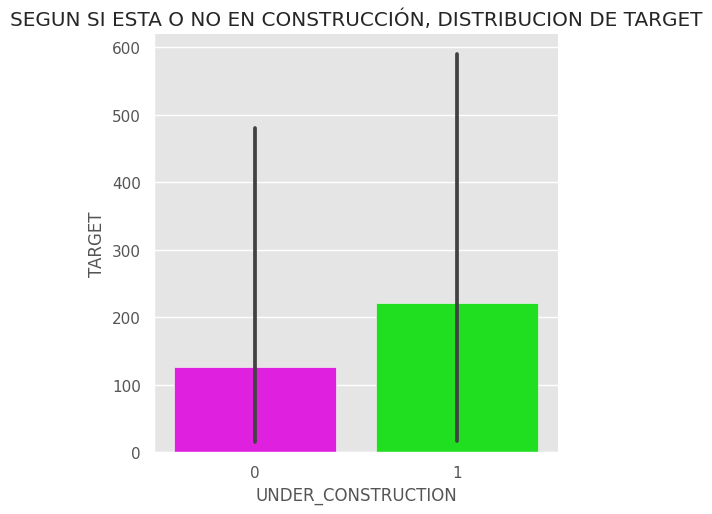

In [ ]:
colores=["magenta","lime"]
grafico=sns.catplot(data=casas, x="UNDER_CONSTRUCTION", y="TARGET", errorbar=("pi", 95), palette=colores, kind="bar")
grafico.set(title='SEGUN SI ESTA O NO EN CONSTRUCCIÓN, DISTRIBUCION DE TARGET')

**SE PUEDE OBSERVAR QUE:**
- **LA MAYORIA DE LAS PROPIEDADES SE ENCUENTRAN TERMINADAS Y TIENEN UNA VARIABILIDAD ALTA DE LOS DATOS, ES DECIR ESTOS SE DISTRIBUYEN LEJOS DE LA MEDIA**
- **LA MAYORIA DE LAS VIVIENDAS QUE SE ENCUENTRAN BAJO LA LEY SON LAS QUE ESTAN EN CONSTRUCCIÓN**

## Binarias

### Cumple con las regulaciones? (RERA)

In [ ]:
#Cumple o no cumple con las regulacionens
casas.RERA.value_counts()

0    20088
1     9363
Name: RERA, dtype: int64

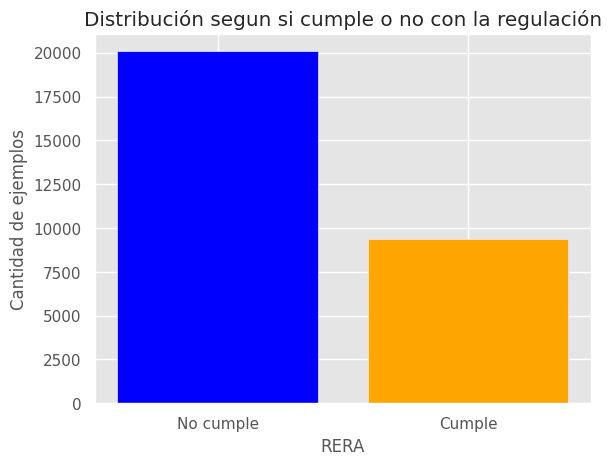

In [ ]:
counts = casas['RERA'].value_counts()
categoria=["No cumple","Cumple"]
colores=["blue","orange"]
plt.bar(categoria, counts.values,color=colores)
plt.xlabel('RERA')
plt.ylabel('Cantidad de ejemplos')
plt.title('Distribución segun si cumple o no con la regulación')

plt.show()

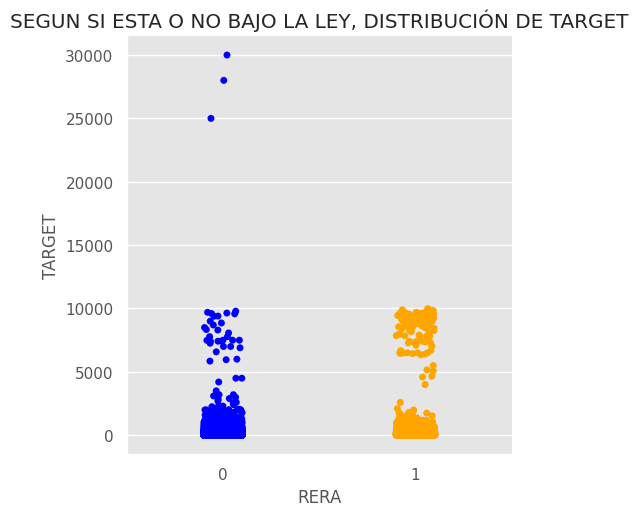

In [ ]:
colores=["blue","orange"]
grafico=sns.catplot(data=casas, x="RERA", y="TARGET",hue="RERA", palette=colores)
grafico.set(title='SEGUN SI ESTA O NO BAJO LA LEY, DISTRIBUCIÓN DE TARGET')

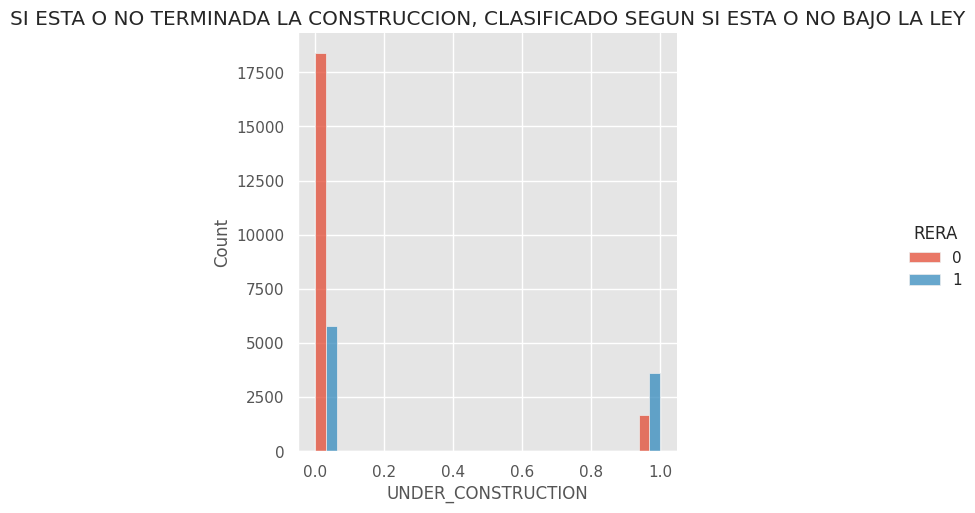

In [ ]:
grafico=sns.displot(casas, x="UNDER_CONSTRUCTION", hue="RERA", multiple="dodge")
grafico.set(title='SI ESTA O NO TERMINADA LA CONSTRUCCION, CLASIFICADO SEGUN SI ESTA O NO BAJO LA LEY')

**SE PUEDE OBSERVAR:**
- **SE PUEDE OBSERVAR QUE SI ESTA O NO BAJO LA LEY NO ES MUY RELEVANTE PARA DEFINIR EL TARGET, YA QUE ESTANDO O NO BAJO LA LEY AMBOS SE TIENEN MAS O MENOS EL MISMMO RANGO CON RESPECTO AL PRECIO**
- **LA MAYORIA DE LAS CASAS QUE ESTAN BAJO CONSTRUCCION CUMPLEN CON LA LEY**


### UNICO DUEÑO O MAS DE UN DUEÑO (RESALE)

In [ ]:
casas.RESALE.value_counts()

1    27377
0     2074
Name: RESALE, dtype: int64

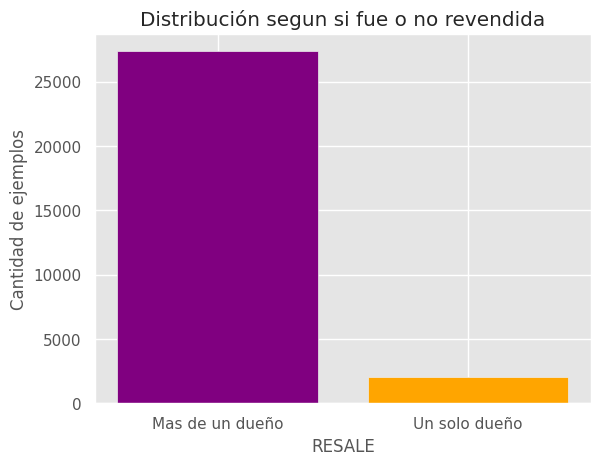

In [ ]:
counts = casas['RESALE'].value_counts()
categoria=["Mas de un dueño","Un solo dueño"]
colores=["purple","orange"]
plt.bar(categoria, counts.values,color=colores)
plt.xlabel('RESALE')
plt.ylabel('Cantidad de ejemplos')
plt.title('Distribución segun si fue o no revendida')

plt.show()

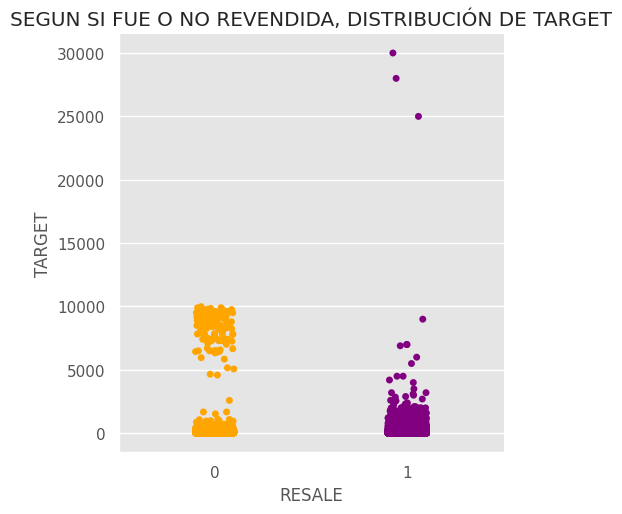

In [ ]:
colores=["orange","purple"]
grafico=sns.catplot(data=casas, x="RESALE", y="TARGET",hue="RESALE", palette=colores)
grafico.set(title='SEGUN SI FUE O NO REVENDIDA, DISTRIBUCIÓN DE TARGET')

**SE PUEDE OBSERVAR QUE:**
- **LAS VIVIENDAS REVENDIDAS SE ENCUENTRAN EN UNA RAGO MENOR CON RESPECTO AL TARGET QUE LAS VIVIENDAS QUE NO HAN SIDO REVENDIDAS, LO QUE TIENE LOGICA**
- **LA MAYORIA DE LOS EJEMPLOS SON VIVIENDAS REVENDIDAS**

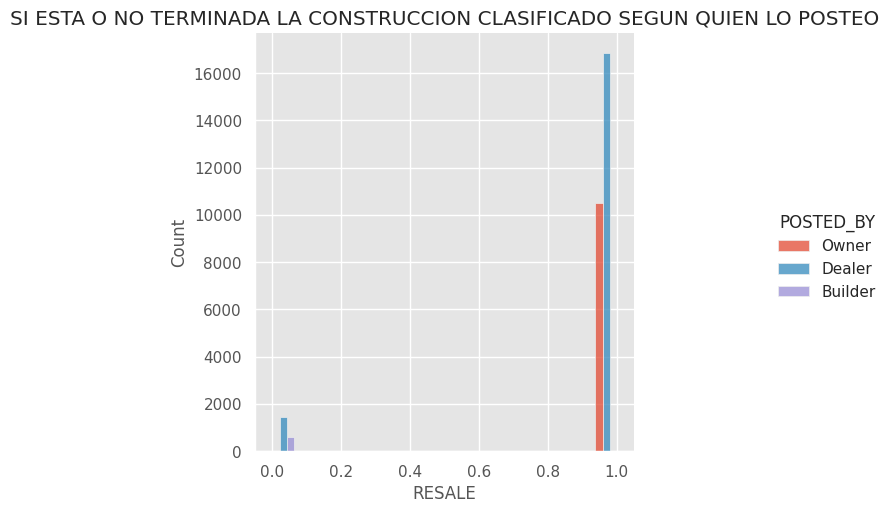

In [ ]:
grafico=sns.displot(casas, x="RESALE", hue="POSTED_BY", multiple="dodge")
grafico.set(title='SI ESTA O NO TERMINADA LA CONSTRUCCION CLASIFICADO SEGUN QUIEN LO POSTEO')

**TIENE LÓGICA PORQUE LAS VIVIENDAS QUE NO HAN SIDO REVENDIDAS, ES DECIR QUE HAN TENIDO UN O NINGUN DUEÑO, SON POSTEADAS SOLO POR CONSTRUCTORAS O CONSECIONARIOS Y LAS QUE SI HAN SIDO REVENDIDAS SON POSTEADAS POR SUS DUEÑOS ACTUALES O POR CONSECIONARIAS QUE SE DEDICAN A LA REVENTA DE CASAS**

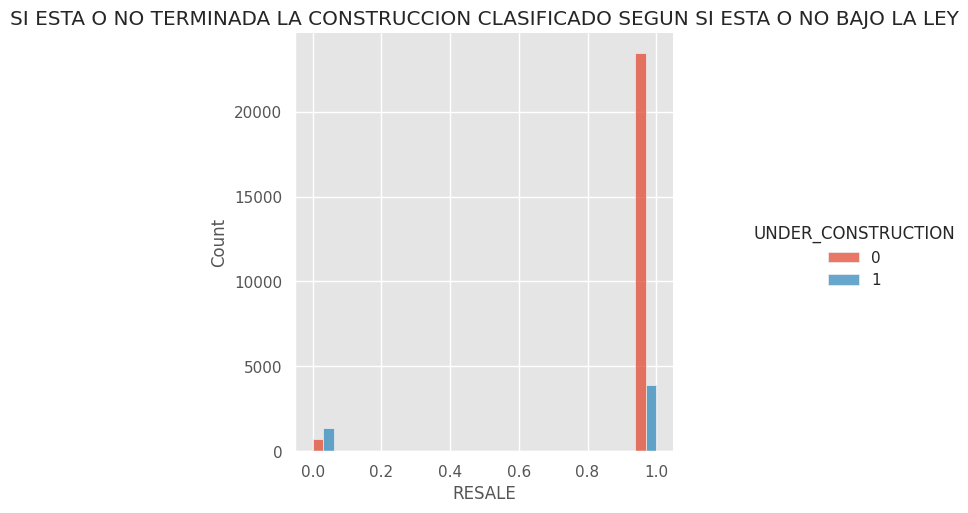

In [ ]:
grafico=sns.displot(casas, x="RESALE", hue="UNDER_CONSTRUCTION", multiple="dodge")
grafico.set(title='SI ESTA O NO TERMINADA LA CONSTRUCCION CLASIFICADO SEGUN SI ESTA O NO BAJO LA LEY')

**SE PUEDE OBSERVAR QUE:**
- **HAY VIVIENDAS QUE ESTAN BAJO CONSTRUCCION Y FUERON REVENDIDAS LO QUE NO TIENE MUCHA LOGICA**

### Vivienda lista o no para mudarse (READY_TO_MOVE)

In [ ]:
casas.READY_TO_MOVE.value_counts()

1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64

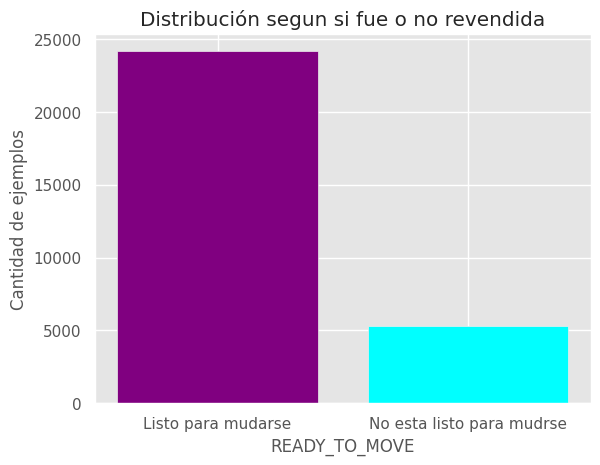

In [ ]:
counts = casas['READY_TO_MOVE'].value_counts()
categoria=["Listo para mudarse","No esta listo para mudrse"]
colores=["purple","cyan"]
plt.bar(categoria, counts.values,color=colores)
plt.xlabel('READY_TO_MOVE')
plt.ylabel('Cantidad de ejemplos')
plt.title('Distribución segun si fue o no revendida')

plt.show()

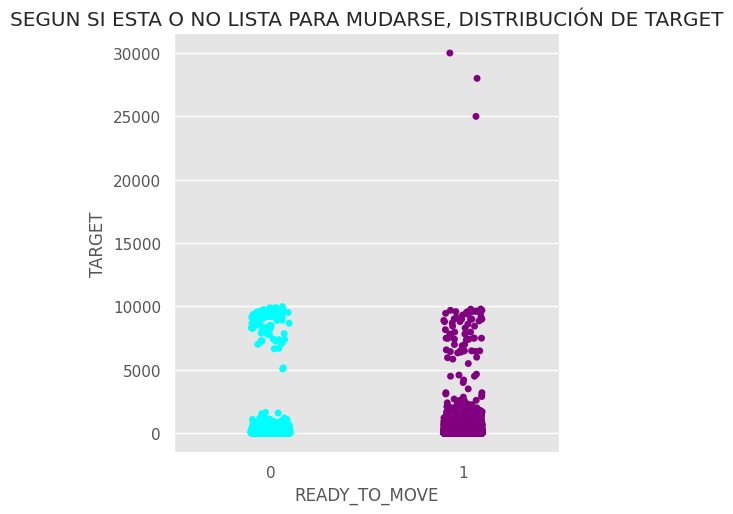

In [ ]:
colores=["cyan","purple"]
grafico=sns.catplot(data=casas, x="READY_TO_MOVE", y="TARGET",hue="READY_TO_MOVE", palette=colores)
grafico.set(title='SEGUN SI ESTA O NO LISTA PARA MUDARSE, DISTRIBUCIÓN DE TARGET')

**SE PUEDE OBSERVAR QUE:**
- **SI LA VIVIENDA ESTA LISTA PARA MUDARSE O NO, PARECE NO AFECTAR TANTO AL TARGET YA QUE PUEDE QUE LAS QUE ESTEN EN CONSTRUCCIÓN, NO ESTEN LISTAS PARA MUDARSE PERO AL SER NUEVAS AUMENTAN SU PRECIO**

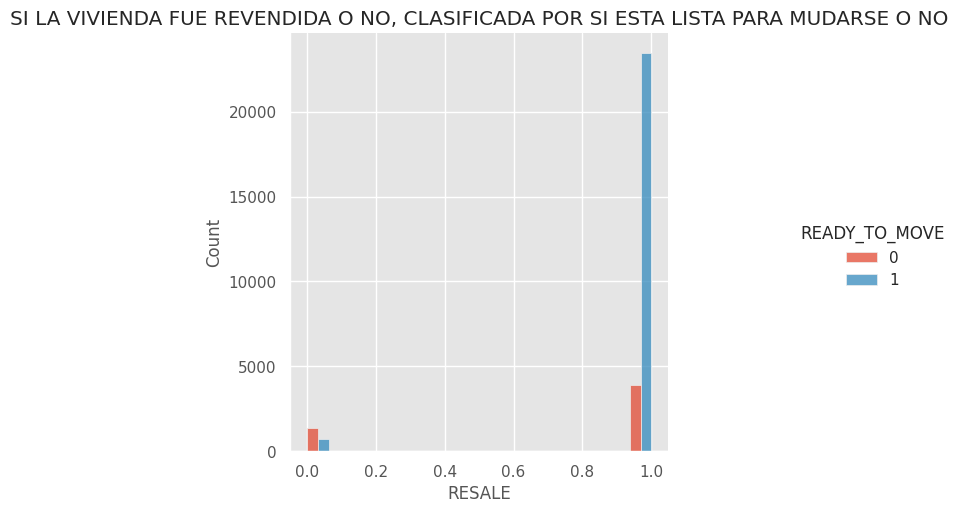

In [ ]:
grafico=sns.displot(casas, x="RESALE", hue="READY_TO_MOVE", multiple="dodge")
grafico.set(title='SI LA VIVIENDA FUE REVENDIDA O NO, CLASIFICADA POR SI ESTA LISTA PARA MUDARSE O NO')

**LA MAYORIA DE LAS VIVIENDAS REVENDIDAS ESTAN LISTAS PARA MUDARSE**

## Numéricas continuas

### Precio (TARGET)

<Axes: xlabel='SQUARE_FT', ylabel='TARGET'>

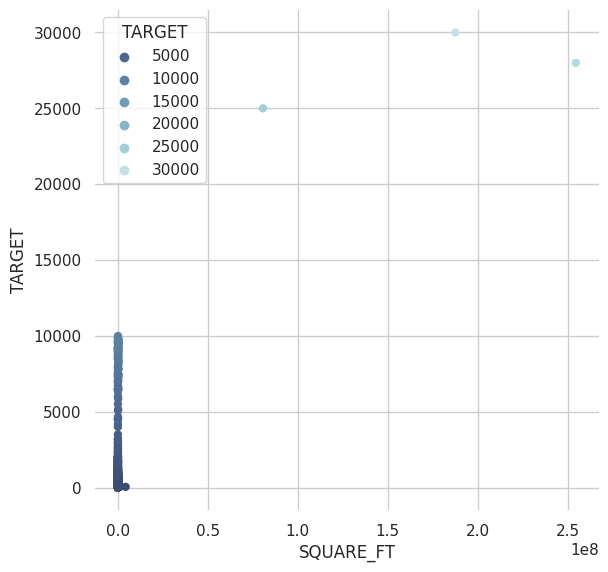

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="SQUARE_FT", y="TARGET",
                hue="TARGET",
                palette="ch:r=-.2,d=.3_r",
                hue_order=casas["TARGET"],
                sizes=(1, 8), linewidth=0,
                data=casas, ax=ax)

**SE PUEDE OBSERVAR QUE:**
- **EXISTEN TRES EJEMPLOS QUE, AUNQUE SIGUEN LA LOGICA REAL DE QUE A MAYOR CAMTIDAD DE METROS CUADRADOS MAYOR PRECIO, SON VALORES MUCHO MAS ALTOS QUE LOS DEMAS EJEMPLOS DEL DATASET Y COMO NO SE CONOCE SI ESTOS SON CASOS ESPECIALES DE PROPIEDADES MUY GRANDES Y VALIOSAS SE TOMARÁN COMO OUTLIERS**

# Detección de outliers

### **METODOLOGIA: RANGO INTERCUARTILICO**


### Metros cuadrados (SQUARE_FT)

In [ ]:
percentile=[0.0009,0.001,0.0015,0.002,0.003,0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95,0.99,0.992,0.993,0.994,0.995]
casas['SQUARE_FT'].describe(percentile).apply(lambda x: format(x,"f"))

count        29451.000000
mean         19802.170190
std        1901334.912504
min              3.000000
0.09%           99.987628
0.1%           115.076530
0.15%          217.995007
0.2%           245.554209
0.3%           296.341959
1%             375.000000
10%            640.113798
25%            900.021130
50%           1175.056750
75%           1550.688124
90%           2050.580998
95%           2619.047619
99%           5462.568609
99.2%         6600.006600
99.3%         8479.145733
99.4%        11079.187999
99.5%        41910.628282
max      254545454.500000
Name: SQUARE_FT, dtype: object

**DEBIDO A LA PRESENCIA DE VALORES DEMASIADO ALTOS, ES NECESARIO CONSIDERAR QUE SI SE SELECIONA EL PRIMER Y TERCER CUARTIL (25% Y 75%) QUEDARIAN DEMASIADOS EJEMPLOS COMO OUTLIERS POR LO QUE SE ANALIZARON LOS VALORES DE DIFERENTES PERCENTILES Y SE SELECCIONÓ 0,09% Y 99,3% PARA TENER UNA VISION MAS ROBUSTA DE LA DISTRIBUCION DE LA MAYORIA DE LOS DATOS Y ELIMINAR EL RUIDO QUE GENERAN LOS OUTLIERS**

**TAMBIEN SE PUEDE OBSERVAR QUE LA DESVIACION ESTANDAR ES DEMASIADO GRANDE**

In [ ]:
casas.sort_values("SQUARE_FT",ascending=True)
Q1 = casas['SQUARE_FT'].quantile(0.001)
Q3 = casas['SQUARE_FT'].quantile(0.99)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = casas[(casas['SQUARE_FT'] < limite_inferior) | (casas['SQUARE_FT'] > limite_superior)]

eliminar=outliers.index
print(f"Indices a eliminar:")
eliminar



Indices a eliminar:


Int64Index([   40,   294,   373,   554,   722,  1041,  1225,  1333,  1469,
             1626,
            ...
            28096, 28534, 28539, 28591, 28821, 28925, 29002, 29187, 29293,
            29372],
           dtype='int64', length=167)

In [ ]:
casas=casas.drop(eliminar)

In [ ]:
casas["SQUARE_FT"].describe()

count    29284.000000
mean      1316.195573
std        776.524909
min          3.000000
25%        900.000000
50%       1171.191189
75%       1547.668404
max      12755.102040
Name: SQUARE_FT, dtype: float64

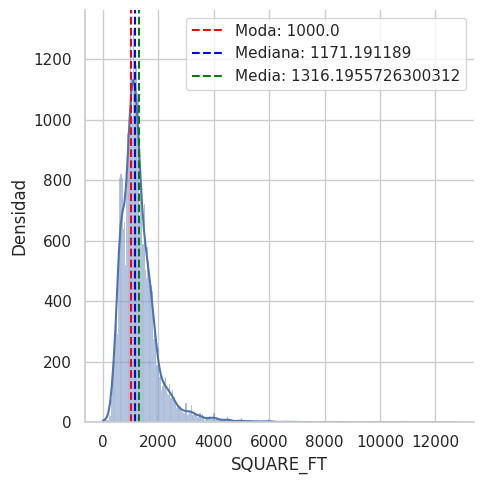

In [ ]:
data = casas["SQUARE_FT"]

sns.displot(data=casas,x="SQUARE_FT",kde=True)

mode = data.mode().values[0]
median = data.median()
mean = data.mean()

plt.axvline(x=mode, color='red', linestyle='--', label=f'Moda: {mode}')
plt.axvline(x=median, color='blue', linestyle='--', label=f'Mediana: {median}')
plt.axvline(x=mean, color='green', linestyle='--', label=f'Media: {mean}')

plt.xlabel('SQUARE_FT')
plt.ylabel('Densidad')
plt.legend()

plt.show()

**LA DISTRIBUCION ES DE FORMA ASIMETRICA NEGATIVA DEBIDO A QUE LA MEDIANA ESTA A LA DERECHA DE LA MEDIA LO QUE INDICA QUE HAY VALORES SEMASIADO BAJOS QUE PUEDEN ESTAR DESPLAZANDO LA MEDIA HACIA LA IZQUIERDA.**

### TARGET (PRECIO)

In [ ]:
percentile=[0.0009,0.001,0.0015,0.002,0.003,0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95,0.99,0.992,0.993,0.994,0.995]
casas['TARGET'].describe(percentile).apply(lambda x: format(x,"f"))

count    29284.000000
mean       102.129832
std        187.011038
min          0.250000
0.09%        5.070940
0.1%         5.784900
0.15%        7.000000
0.2%         7.500000
0.3%         8.500000
1%          12.200000
10%         25.000000
25%         37.975000
50%         61.000000
75%        100.000000
90%        200.000000
95%        290.000000
99%        750.000000
99.2%      850.000000
99.3%      910.190000
99.4%      983.020000
99.5%     1065.850000
max       9000.000000
Name: TARGET, dtype: object

In [ ]:
casas.sort_values("TARGET",ascending=True)
Q1 = casas['TARGET'].quantile(0.01)
Q3 = casas['TARGET'].quantile(0.994)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = casas[(casas['TARGET'] < limite_inferior) | (casas['TARGET'] > limite_superior)]

eliminar2=outliers.index
print(f"Indices a eliminar:")
eliminar2



Indices a eliminar:


Int64Index([  646,  3963,  4120,  6451,  6585,  6720,  8931, 12834, 14908,
            15224, 16297, 17199, 17684, 20915, 23636, 24735, 24807, 26057,
            28414, 28526],
           dtype='int64')

In [ ]:
casas=casas.drop(eliminar2)

In [ ]:
casas["TARGET"].describe()

count    29264.000000
mean        99.185689
std        141.540500
min          0.250000
25%         37.900000
50%         61.000000
75%        100.000000
max       2400.000000
Name: TARGET, dtype: float64

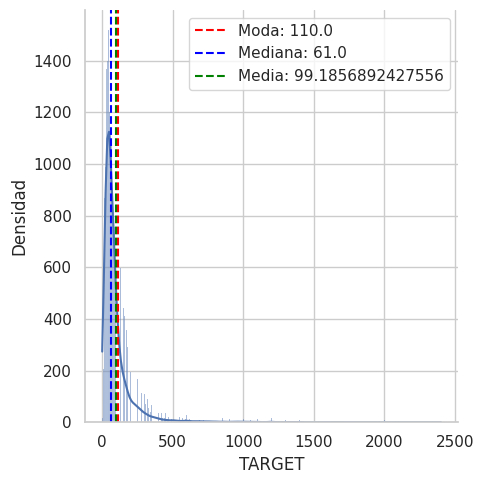

In [ ]:
data = casas["TARGET"]
sns.displot(data=casas,x="TARGET",kde=True)
mode = data.mode().values[0]
median = data.median()
mean = data.mean()

plt.axvline(x=mode, color='red', linestyle='--', label=f'Moda: {mode}')
plt.axvline(x=median, color='blue', linestyle='--', label=f'Mediana: {median}')
plt.axvline(x=mean, color='green', linestyle='--', label=f'Media: {mean}')

plt.xlabel('TARGET')
plt.ylabel('Densidad')
plt.legend()

plt.show()



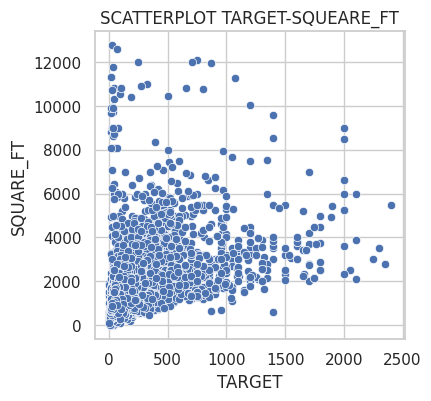

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x=casas["TARGET"], y=casas["SQUARE_FT"])
plt.title('SCATTERPLOT TARGET-SQUEARE_FT')
plt.show()


**SIGUEN EXISTIENDO DATOS CON MUCHOS METROS CUADRADOS Y UN VALOR MUY BAJO, QUE PODRIAN SER CASAS MUY GRANDES PERO ANTIGUAS Y EN MAL ESTADO O ESTAFAS**

### Latitud

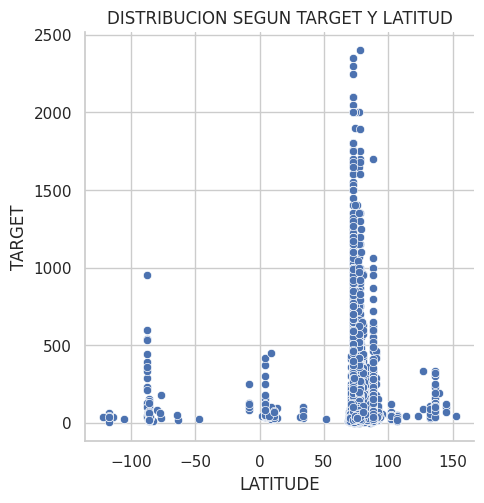

In [ ]:
grafico=sns.relplot(data=casas,
                    x="LATITUDE", y="TARGET")
grafico.set(title='DISTRIBUCION SEGUN TARGET Y LATITUD')

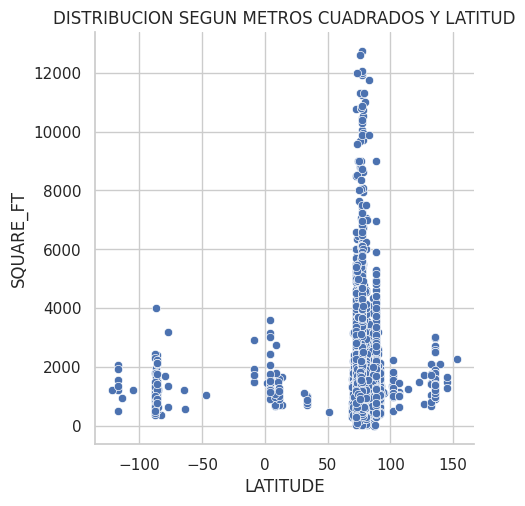

In [ ]:
grafico=sns.relplot(
    data=casas,
    x="LATITUDE", y="SQUARE_FT")
grafico.set(title='DISTRIBUCION SEGUN METROS CUADRADOS Y LATITUD')

### Longitud

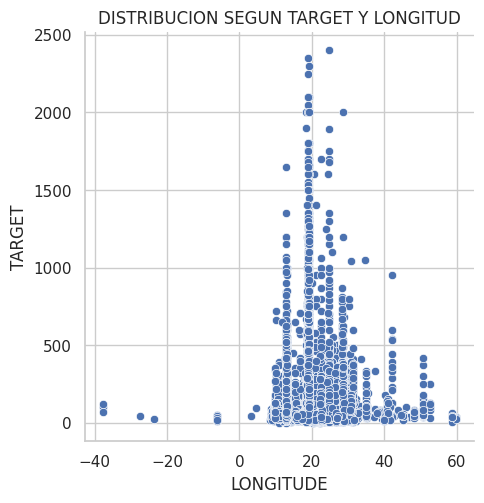

In [ ]:
grafico=sns.relplot(
    data=casas,
    x="LONGITUDE", y="TARGET")
grafico.set(title='DISTRIBUCION SEGUN TARGET Y LONGITUD')

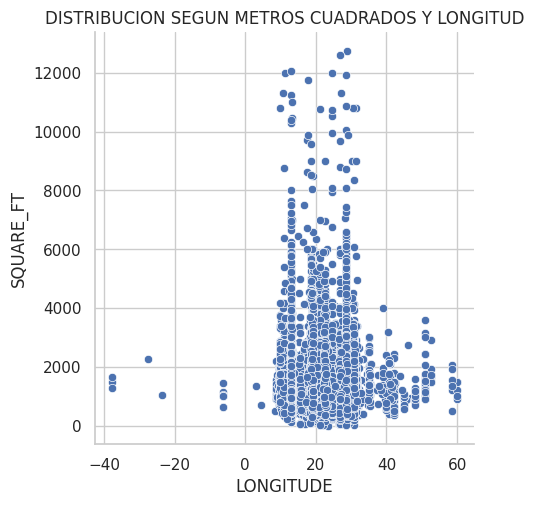

In [ ]:
grafico=sns.relplot(data=casas,x="LONGITUDE", y="SQUARE_FT")
grafico.set(title='DISTRIBUCION SEGUN METROS CUADRADOS Y LONGITUD')

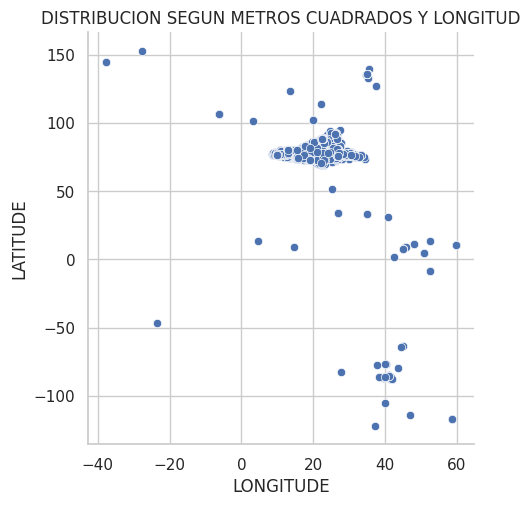

In [ ]:
grafico=sns.relplot(data=casas,x="LONGITUDE", y="LATITUDE")
grafico.set(title='DISTRIBUCION SEGUN METROS CUADRADOS Y LONGITUD')

**COMO DE PUEDE OBSERVAR EN EL GRÁFICO LA MAYORIA DE LOS EJEMPLOS SE ENCUENTRAN EN LATITUDES Y LONGITUDES POSITIVAS DEBIDO A QUE LOS EJEMPLOS DEL DATASET SE ENCUENTRAN EN INDIA, SEGUN LAS DIRECCIONES, Y ESTE PAIS ESTA UBICADO  AL NORTE DEL ECUADOR Y AL ESTE DEL MERIDIANO DE GREENWHICH POR LO QUE AMBOS PARAMETROS DEBERIAN SER POSITIVOS LOS EJEMPLOS CON LATITUDES Y LONGITUDES NEGATIVAS SON OUTLIERS**

**COMO EL DATASET ES DE PROPIEDADES DE LA INDIA, A CONTINUACION SE IDENTIFICAN TODOS LOS EJEMPLOS QUE SE ENCUENTRAN FUERA DE LAS SIGUIENTES COORDENADAS:**
- **Latitud: 20.5937° N a 6.4627° N**
- **Longitud: 68.1097° E a 97.3956° E**

In [ ]:
longitud_condicion = (casas['LONGITUDE'] > 20.5937)
longitud_condicion2 =(casas['LONGITUDE'] < 6.4627)
latitud_condicion = (casas['LATITUDE'] < 68.1097)
latitud_condicion2 =(casas['LATITUDE'] > 97.3956)
indices_no_cumplen = casas.loc[(longitud_condicion |  longitud_condicion2) & (latitud_condicion | latitud_condicion2)].index
indices_no_cumplen


Int64Index([  200,   327,   568,   625,   770,  1206,  1686,  1752,  1975,
             2156,
            ...
            28476, 28525, 28683, 28768, 28886, 28942, 28951, 29044, 29116,
            29447],
           dtype='int64', length=241)

In [ ]:
casas = casas.drop(indices_no_cumplen)

In [ ]:
#casas=casas.drop("Unnamed: 0",axis=1)
casas.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NRO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


# Ingenieria de Features

## Clustering (LATITUDE Y LONGITUDE)

In [ ]:
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np

In [ ]:
k = 4
kmeans = cluster.KMeans(n_clusters=k,random_state=0,n_init=10)

posicion = casas[["LONGITUDE","LATITUDE"]].copy()

casas["CATEGORIA_PRECIO"]=kmeans.fit_predict(posicion)
casas["CATEGORIA_PRECIO"].value_counts()

2    9857
1    9518
0    6513
3    3135
Name: CATEGORIA_PRECIO, dtype: int64

In [ ]:
kmeans.cluster_centers_

array([[12.91830664, 78.01037977],
       [28.00495566, 77.30482987],
       [19.57596959, 73.64009776],
       [22.50567313, 87.19306068]])

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

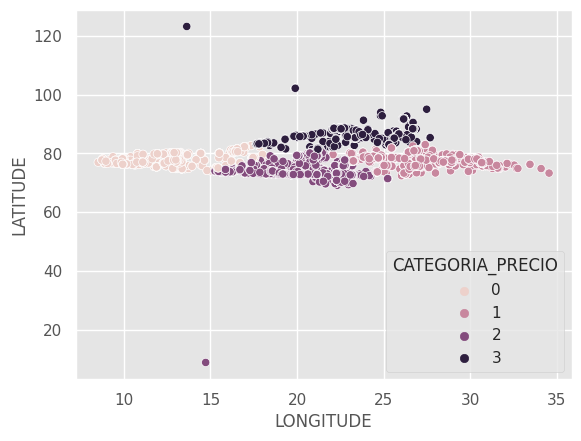

In [ ]:
sns.scatterplot(data=casas, x="LONGITUDE",y="LATITUDE", hue="CATEGORIA_PRECIO")

In [ ]:
ss = StandardScaler()

# Copia de los datos originales
X1 = posicion.copy()

# Ajusta el escalador sin modificar la variable original
ss.fit(X1)

# Escala los datos sin modificar la variable original
X_scaled = ss.transform(X1)

range_n_cluster = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_cluster:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("Para n_cluster =", n_clusters, "El promedio de Silhouette_score es:", silhouette_avg)

Para n_cluster = 2 El promedio de Silhouette_score es: 0.5142557662123008
Para n_cluster = 3 El promedio de Silhouette_score es: 0.5975458462382797
Para n_cluster = 4 El promedio de Silhouette_score es: 0.7090694264780896
Para n_cluster = 5 El promedio de Silhouette_score es: 0.7076694758543131
Para n_cluster = 6 El promedio de Silhouette_score es: 0.699995651692799
Para n_cluster = 7 El promedio de Silhouette_score es: 0.6787169866244075
Para n_cluster = 8 El promedio de Silhouette_score es: 0.6559726725307432
Para n_cluster = 9 El promedio de Silhouette_score es: 0.6498652584862155
Para n_cluster = 10 El promedio de Silhouette_score es: 0.6606185733129668


**GRACIAS A LA LONGITUD Y LATITUD SE PUEDE CREAR UN NUEVO FEATURE DEBIDO A QUE SE CREAN GRUPOS SEGÚN SU TARGET TOMANDO EN CUENTA LA UBICACIÓN DE LA PROPIEDAD**

## Analisis de correlación

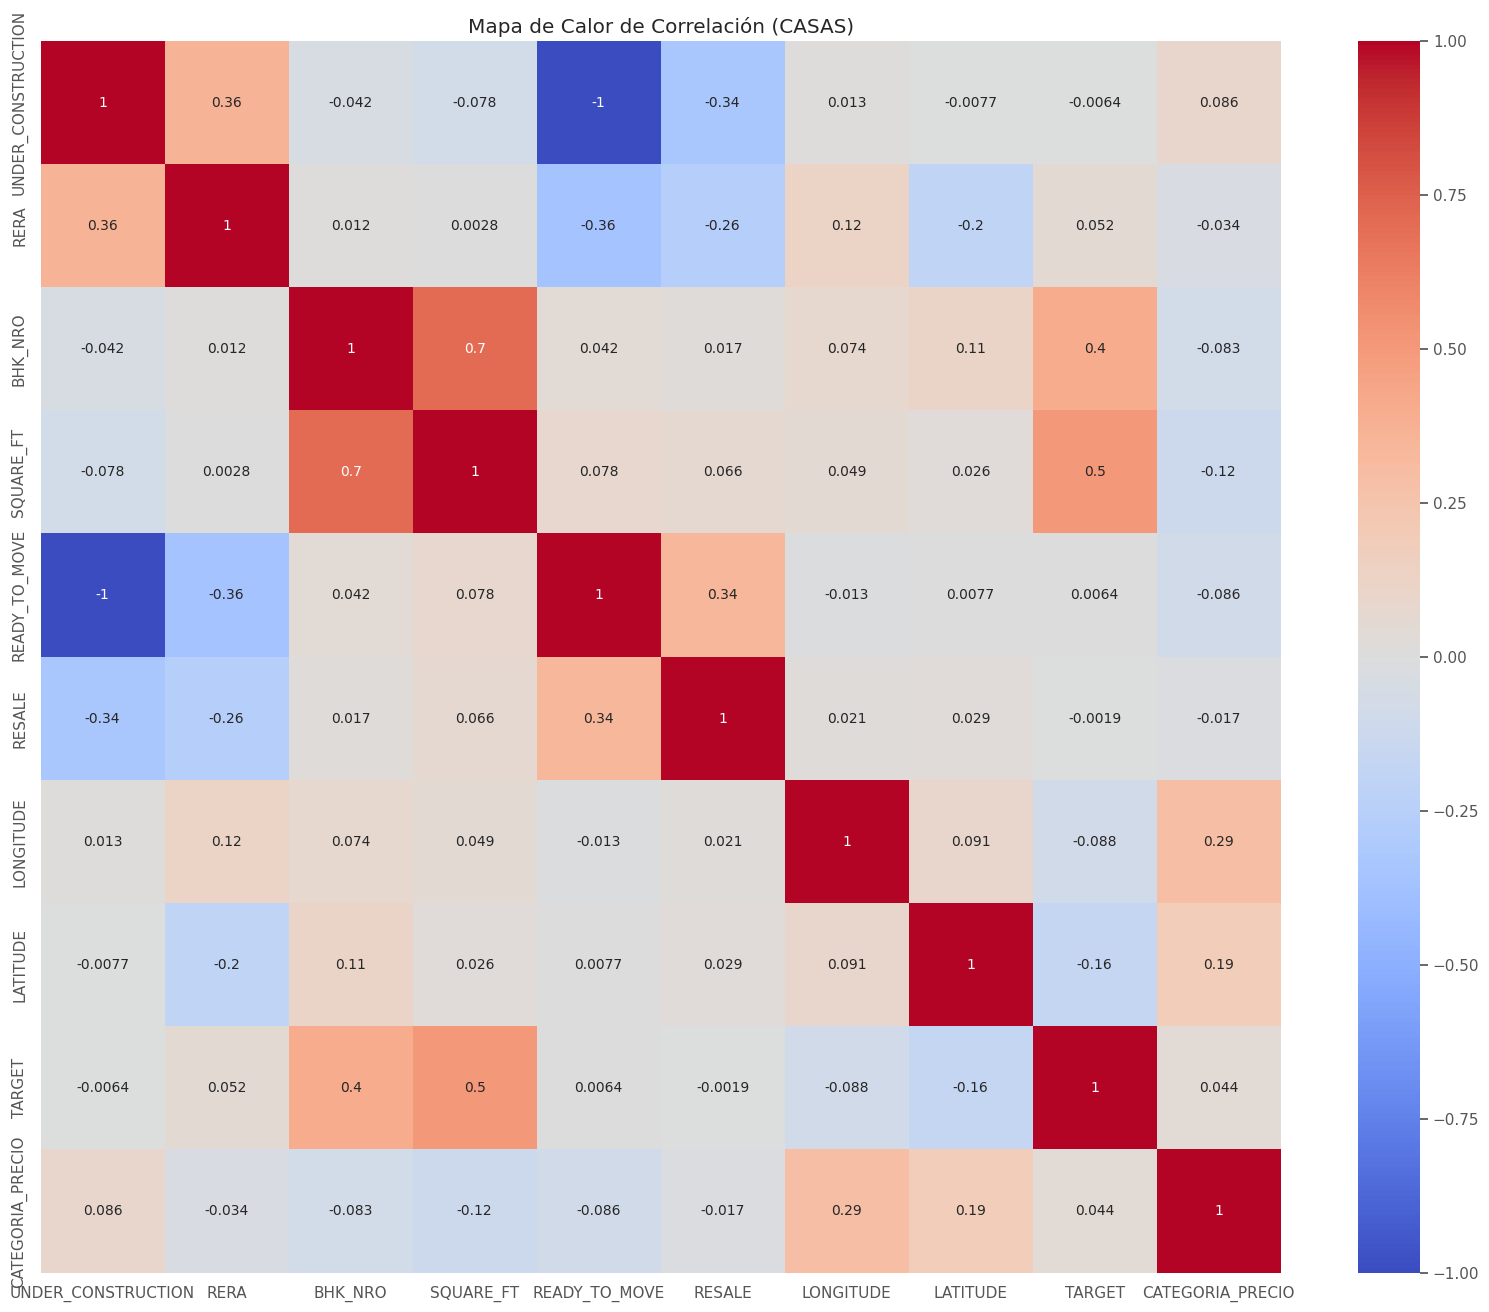

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(casas.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación (CASAS)')
plt.show()

- **CON EL ANALISIS DE CORRELACION SE PUEDE OBSERVAR COMO LAS VARIABLES SE RELACIONAN ENTRE SI Y EN QUE DIRECCION LO HACEN, SI POSITIVA O NEGETIVAMENTE Y SI SE OBSERVA CON RESPECTO AL TARGET QUE ES EL LABEL OBJETIVO, SE PUEDE VER QUE LA FEATURE MAS RELACIONADA SON LOS METROS CUADRADOS Y ES UNA CORRELACION POSITIVA, ES DECIR QUE A MAYOR CANTIDAD DE METROS CUADRADOS, AUMENTA EL PRECIO (TARGET) Y LUEGO SI FUE O NO REVENDIDA QUE TIENE UNA CORRELACION MUCHO MENOR Y NEGATIVA ES DECIR QUE SI FUE REVENDIDO EL PRECIO DISMINNUYE.**


- **TAMBIEN SE PUEDEN OBSERVAR CORRELACIONES ENTRE VARIABLES COMO POR EJEMPLO ENTRE READY_TO_MOVE Y UNDER_CONSTRUCTION QUE TIENEN UNA CORRELACION PERFECTA NEGATIVA, ES DECIR, QUE SI ESTA EN CONSTRUCCION NO ESTA LISTA PARA MUDARSE Y SI ESTA LISTA PARA  MUDARSE NO ESTA EN CONSTRUCCION (QUE COMO SE PUDO OBERVAR EN EL ANALISIS ANTERIOR NO EXISTEN EJEMPLOS DE VIVIENDAS QUE ESTAN EN COSNTRUCCION Y ESTAN LISTOS PARA MUDARSE**


- **CON ESTE ANALISIS TAMBIEN SE PUEDE VER QUE LO QUE SE CREIA ANTERIORMENTE ACERCA DE QUE LA CORRELACION ENTRE EL TARGET Y LA CANTIDAD DE HABITACIONES ERA POSITIVA Y FUERTE NO ES TAN ASI YA QUE SI ES POSITIVA PERO MUY CERCANA A CERO LO QUIEINDICA UNA RELACON MAS BIEN DEBIL AUNQUE MAS SIGNIFICATIVA QUE OTRAS VARIABLES**

## - Dvisión del nuevo dataset en:
* Dataset de testeo: 30%
* Dataset de entrenamiento: 70%

## - Transformación de los features categoricos a boolianos
* POSTED_BY: Debido a que es el unico feature categorico que nos interesa
## - Eliminación de columnas:
* Unnamed:0
* BHK_OR_RK: Debido a que tiene muy pocos ejemplos de una de las categorias por lo que es irrelevante.
* ADDRESS: Debido a que ya se tienen las longitudes y latitudes que permiten entender donde se encuentra ubicada la propiedad

## - Normalización de los datos:

In [ ]:
casas.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NRO               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
TARGET                0
CATEGORIA_PRECIO      0
dtype: int64

In [ ]:
columnas=["POSTED_BY",'BHK_NRO', 'SQUARE_FT', 'LONGITUDE',
       'LATITUDE',"CATEGORIA_PRECIO"]

In [ ]:
X =casas[columnas]
Y = casas['TARGET']
print(X.shape, Y.shape)

(29023, 6) (29023,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X_dummies = pd.get_dummies(x_train['POSTED_BY'])
x_train=pd.concat([X_dummies, x_train.drop(['POSTED_BY'], axis=1)], axis=1)
x_train.head()

,Builder,Dealer,Owner,BHK_NRO,SQUARE_FT,LONGITUDE,LATITUDE,CATEGORIA_PRECIO
16998,0,0,1,2,1000.000000,22.300000,73.200000,2
5543,0,0,1,3,1125.054089,23.762564,86.976297,3
13817,0,1,0,3,1687.289089,19.235000,72.859800,2
2826,0,1,0,2,1157.052918,12.990758,77.656104,0
2260,0,1,0,1,586.994728,28.553374,77.355611,1


## Entrenamiento de modelos
* Random Forest
* KNN
* Arbol de regresion

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
rf = RandomForestRegressor()
knn = KNeighborsRegressor()
arbol = DecisionTreeRegressor()

In [ ]:
rf.fit(x_train, y_train)
knn.fit(x_train, y_train)
arbol.fit(x_train, y_train)

DecisionTreeRegressor()

## Predicciones

In [ ]:
X_dummies = pd.get_dummies(x_test['POSTED_BY'])
x_test=pd.concat([X_dummies, x_test.drop(['POSTED_BY'], axis=1)], axis=1)
x_test.head()

,Builder,Dealer,Owner,BHK_NRO,SQUARE_FT,LONGITUDE,LATITUDE,CATEGORIA_PRECIO
25086,0,1,0,3,1523.925632,18.599300,73.762500,2
16283,0,1,0,1,773.938085,23.182972,72.611485,2
23091,0,1,0,3,2187.404619,13.090000,80.270000,0
10795,1,0,0,2,492.792904,19.161955,72.839616,2
12892,0,1,0,2,1150.000000,22.541110,88.337780,3


In [ ]:
models = [('k-Neighbor', knn),
          ('Random Forest', rf),
          ('Arbol de Regression', arbol)]

preds_list = []
for model_name, model in models:
    preds = model.predict(x_test)
    preds_list.append((model_name, preds))

## Metricas

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

for model_name, preds in preds_list:
    mse = mean_squared_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds, squared=False)  # Calcula la raíz cuadrada del MSE
    r2 = r2_score(y_test, preds)

    print(f"Metrics for {model_name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}\n")

Metrics for k-Neighbor:
Mean Squared Error: 12215.70620778684
Root Mean Squared Error: 110.52468596556535
R-squared: 0.4133770721274952

Metrics for Random Forest:
Mean Squared Error: 4641.884034776408
Root Mean Squared Error: 68.13137335160953
R-squared: 0.7770873368263075

Metrics for Arbol de Regression:
Mean Squared Error: 7258.478337442257
Root Mean Squared Error: 85.19670379446764
R-squared: 0.6514331843135444



**Conclusion:**
1. KNN:
* RMSE: 111, es decir que en promedio, las predicciones del modelo tienen un
error de alrededor de +- 111,000 dólares.
* R2: 0,41, significa que aproximadamente el 41% de la variabilidad en los precios de las viviendas se puede explicar mediante las características del modelo utilizado.
2. Random Forest:
*     RMSE: 68, es decir que en promedio, las predicciones del modelo tienen un error de alrededor de +- 68,000 dólares.
      R2: 0,78, significa que aproximadamente el 78% de la variabilidad en los precios de las viviendas se puede explicar mediante las características del modelo utilizado.
3. Arbol Regression:
*     RMSE: 81, es decir que en promedio, las predicciones del modelo tienen un error de alrededor de +- 81,000 dólares.
*     R2: 0,69, significa que aproximadamente el 69% de la variabilidad en los precios de las viviendas se puede explicar mediante las características del modelo utilizado.

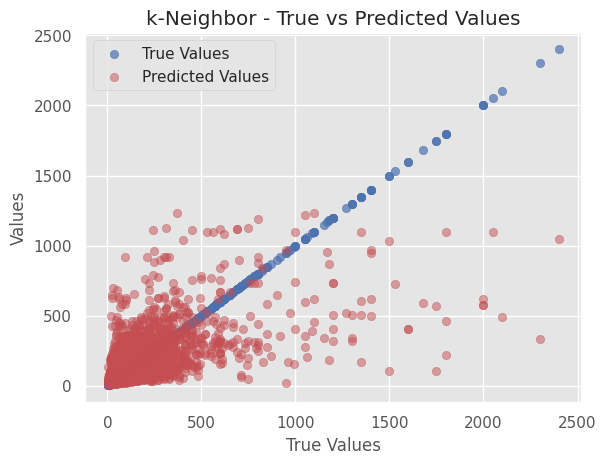

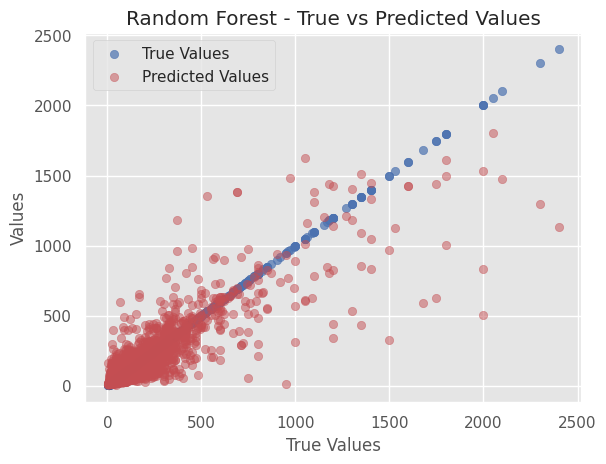

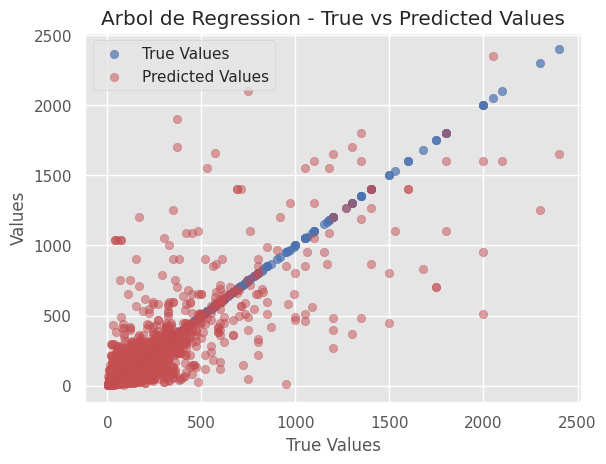

In [ ]:
for model_name, preds in preds_list:
    plt.scatter(y_test, y_test, label='True Values', color='b', alpha=0.7)
    plt.scatter(y_test, preds, label='Predicted Values', color='r', alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Values')
    plt.legend()
    plt.title(f'{model_name} - True vs Predicted Values')
    plt.show()

## Análisis de hiperparametros del modelo KNN

In [ ]:
from sklearn.metrics import mean_absolute_error
error = []
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

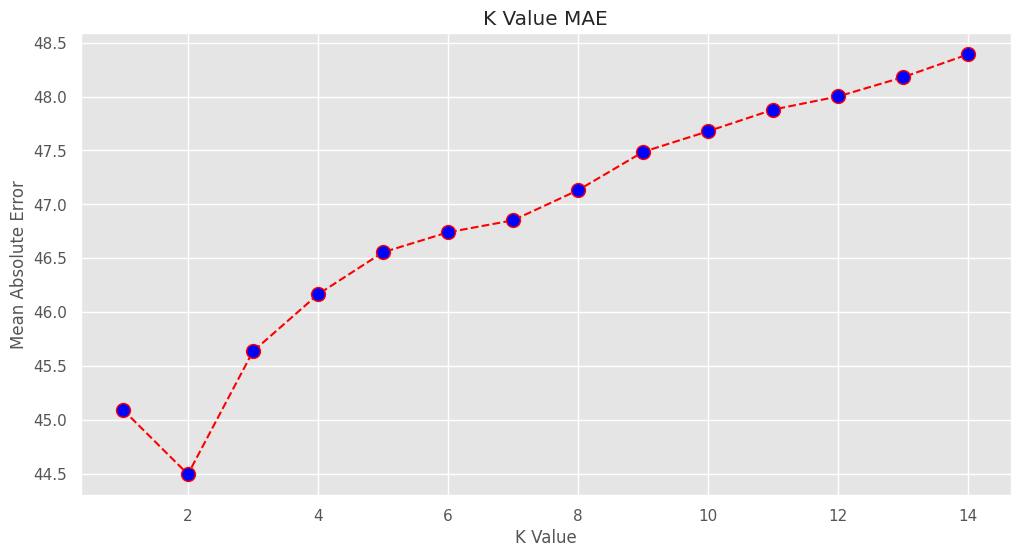

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red',
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

## Análisis de hiperparametros del modelo Arbol de decisión

Mejor score: 78.31104255471966
Mejor depth: 10


DecisionTreeRegressor(max_depth=10, random_state=1)

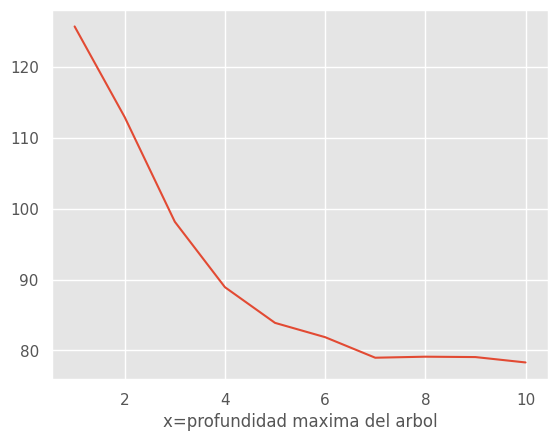

In [ ]:
all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 11):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # Selecciona el mejor comparando con el mejor hasta ahora.
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # Agrega a la lista de scores para graficar
    all_scores.append(current_score)

print("Mejor score: %s" % best_score)
print("Mejor depth: %s" % best_depth)

# Graficar el error como función del max_depth
plt.figure()
plt.plot(range(1, 11), all_scores)
plt.xlabel('x=profundidad maxima del arbol')

# Ajustar el modelo utilizando la mejor max_depth
treereg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
treereg.fit(x_train, y_train)

In [ ]:
atributos = x_train.columns
pd.DataFrame({'Atributo':atributos,
              'importancia':treereg.feature_importances_}).sort_values('importancia', ascending=False).head()

,Atributo,importancia
4,SQUARE_FT,0.382301
6,LATITUDE,0.266444
5,LONGITUDE,0.225934
3,BHK_NRO,0.109134
1,Dealer,0.012275


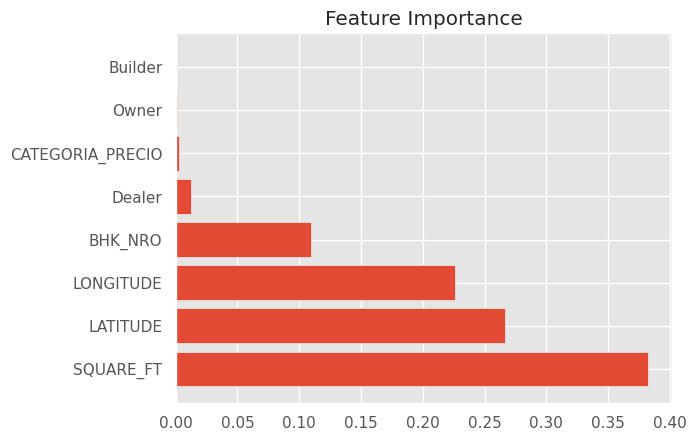

In [ ]:
imp = pd.DataFrame({'atributo':atributos, 'importancia':treereg.feature_importances_}).sort_values('importancia', ascending = False)
plt.title('Feature Importance')
imp.sort_values(by='importancia',ascending = False,inplace=True,)
plt.barh(imp.atributo,imp.importancia)
plt.show()

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rf_scores = cross_val_score(rf, x_train, y_train, cv=5)  # cv es el número de divisiones para la validación cruzada

knn_scores = cross_val_score(knn,x_train, y_train, cv=5)

arbol_scores = cross_val_score(arbol, x_train, y_train, cv=5)

print("RandomForestRegressor Scores:", rf_scores)
print("KNeighborsRegressor Scores:", knn_scores)
print("DecisionTreeRegressor Scores:", arbol_scores)

RandomForestRegressor Scores: [0.7559295  0.79037346 0.77175963 0.78020713 0.81943716]
KNeighborsRegressor Scores: [0.3381974  0.38204186 0.34624089 0.29502657 0.32732991]
DecisionTreeRegressor Scores: [0.61524162 0.67008193 0.68119619 0.67711258 0.70070892]


## Analisis del modelo Random Forest para cada Cluster

In [ ]:
clusters = x_train['CATEGORIA_PRECIO'].unique()
for cluster in clusters:
    # Filtra los datos para el cluster actual en el conjunto de entrenamiento
    x_train_cluster = x_train[x_train['CATEGORIA_PRECIO'] == cluster].drop(['CATEGORIA_PRECIO'], axis=1)
    y_train_cluster = y_train[x_train['CATEGORIA_PRECIO'] == cluster]

    # Filtra los datos para el cluster actual en el conjunto de prueba
    x_test_cluster = x_test[x_test['CATEGORIA_PRECIO'] == cluster].drop(['CATEGORIA_PRECIO'], axis=1)
    y_test_cluster = y_test[x_test['CATEGORIA_PRECIO'] == cluster]

    # Entrenamiento del modelo
    model = RandomForestRegressor(random_state=42)
    model.fit(x_train_cluster, y_train_cluster)

    # Predicciones
    y_pred = model.predict(x_test_cluster)

    # Métricas
    rmse = mean_squared_error(y_test_cluster, y_pred, squared=False)
    mse = mean_squared_error(y_test_cluster, y_pred)
    r2 = r2_score(y_test_cluster, y_pred)

    # Imprime las métricas para el cluster actual
    print(f"Cluster {cluster} - RMSE: {rmse}, MSE: {mse}, R2: {r2}")

Cluster 2 - RMSE: 83.17879142034596, MSE: 6918.71134214942, R2: 0.8292917218130613
Cluster 3 - RMSE: 42.28590976412663, MSE: 1788.09816457986, R2: 0.6192168612445947
Cluster 0 - RMSE: 50.60582511062192, MSE: 2560.9495351268524, R2: 0.7666114366784664
Cluster 1 - RMSE: 65.09391491504228, MSE: 4237.2177589667635, R2: 0.6215884086659671
